## Tabular and Graphical Methods of Continuous-Continuous Variables

### Importing necessary librarires and reading data

In [ ]:
# importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# importing data
data = pd.read_csv('churn_prediction_1.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0,141.0,21.0,5.0,1.0
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0.0,305.0,44.0,11.0,4.0
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0,NaN,NaN,NaN,NaN
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1.0,218.0,32.0,8.0,1.0
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0,307.0,44.0,11.0,6.0


### Isolating numerical variables

In [ ]:
# isolating numericl variables
numeric = data.select_dtypes(exclude = ['object'])
numeric.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,1,2101,66,0.0,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0.0,141.0,21.0,5.0,1.0
1,2,2348,35,0.0,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0.0,305.0,44.0,11.0,4.0
2,4,2194,31,0.0,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0.0,NaN,NaN,NaN,NaN
3,5,2329,90,NaN,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1.0,218.0,32.0,8.0,1.0
4,6,1579,42,2.0,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1.0,307.0,44.0,11.0,6.0


### Building correlation table

In [ ]:
numeric.corr()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
customer_id,1.000000,-0.003340,0.005642,-0.014492,0.000478,0.011553,0.002825,0.003163,0.003164,0.001136,-0.003750,-0.009492,-0.006269,-0.002190,-0.006545,0.002844,0.001148,0.008755,-0.013066,0.002504,-0.012685,0.007660
vintage,-0.003340,1.000000,0.005622,0.001524,0.013474,-0.000930,0.000726,0.000913,0.002519,0.000692,-0.000881,-0.003653,0.000230,-0.002916,-0.006165,0.001418,0.000710,-0.008491,-0.003755,-0.013952,-0.004575,-0.012235
age,0.005642,0.005622,1.000000,-0.001419,0.014202,-0.075482,-0.061419,0.049417,0.053911,0.057334,0.055253,0.033757,0.033452,0.034171,0.037256,0.052813,0.056205,-0.022328,0.019660,0.003493,0.020832,-0.025503
dependents,-0.014492,0.001524,-0.001419,1.000000,0.007330,0.008974,0.020454,-0.003232,-0.003391,-0.000278,-0.001688,0.017433,0.022928,0.021059,0.032335,-0.000770,-0.001237,0.035036,0.080346,0.034708,0.078809,0.003137
city,0.000478,0.013474,0.014202,0.007330,1.000000,0.000946,-0.066341,-0.006505,-0.005222,-0.007928,-0.008672,0.005295,0.010586,-0.001159,0.006203,-0.006594,-0.007974,-0.004846,0.007368,0.007858,0.008364,0.002897
customer_nw_category,0.011553,-0.000930,-0.075482,0.008974,0.000946,1.000000,0.233170,-0.051547,-0.053891,-0.053880,-0.040893,-0.070925,-0.070674,-0.070481,-0.070502,-0.052668,-0.053348,0.008705,-0.052391,-0.014290,-0.050004,0.015023
branch_code,0.002825,0.000726,-0.061419,0.020454,-0.066341,0.233170,1.000000,0.006409,0.005537,0.007841,0.004613,-0.024750,-0.022150,-0.024175,-0.018126,0.006846,0.007953,0.037046,-0.036625,0.003675,-0.034918,0.016181
current_balance,0.003163,0.000913,0.049417,-0.003232,-0.006505,-0.051547,0.006409,1.000000,0.946538,0.959393,0.710088,0.093718,0.059329,0.077365,0.080482,0.984013,0.942117,-0.023679,0.021611,0.000736,0.020478,-0.000262
previous_month_end_balance,0.003164,0.002519,0.053911,-0.003391,-0.005222,-0.053891,0.005537,0.946538,1.000000,0.967662,0.720730,0.099704,0.118408,0.118367,0.111856,0.973827,0.965827,0.007241,0.017477,0.006585,0.016922,0.000108
average_monthly_balance_prevQ,0.001136,0.000692,0.057334,-0.000278,-0.007928,-0.053880,0.007841,0.959393,0.967662,1.000000,0.766145,0.109289,0.088456,0.108038,0.123363,0.975277,0.993900,0.012487,0.016410,0.004865,0.016152,-0.001469


In this table we can see that there are just too many numbars to absorb at the same time. Building and visualising a correlation table is difficult when the number of input variables are large in number.

### Building heatmap

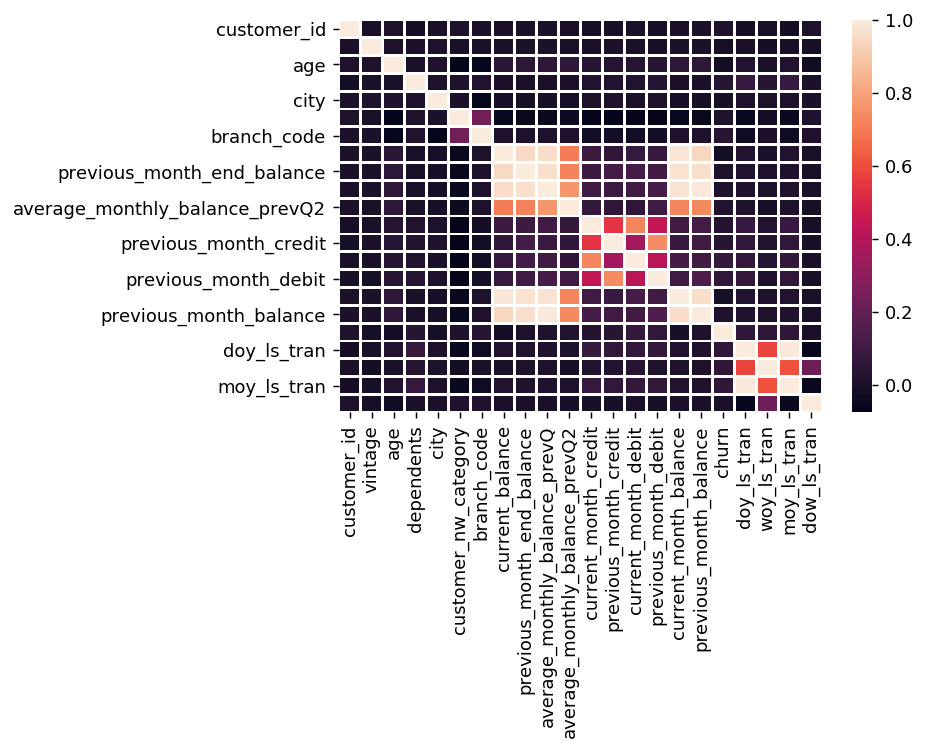

In [ ]:
plt.figure(dpi=130)
sns.heatmap(numeric.corr(), linewidths = 1)

### Scatter plot

In [ ]:
#factor of standard deviation
factor = 0.5

#extracting data and descriptives
dummy = data[['current_month_balance','previous_month_balance']]
m1, m2 = dummy['current_month_balance'].mean(), dummy['current_month_balance'].mean()
sd1, sd2 = dummy['previous_month_balance'].std()*factor, dummy['previous_month_balance'].std()*factor

# calculating upperbound and lowerbound
hi1 = 15000
hi2 = 15000

# isolating data
dummy['current_month_balance'] = dummy['current_month_balance'][dummy['current_month_balance']<hi1]
dummy['previous_month_balance'] = dummy['previous_month_balance'][dummy['previous_month_balance']<hi2]

[]

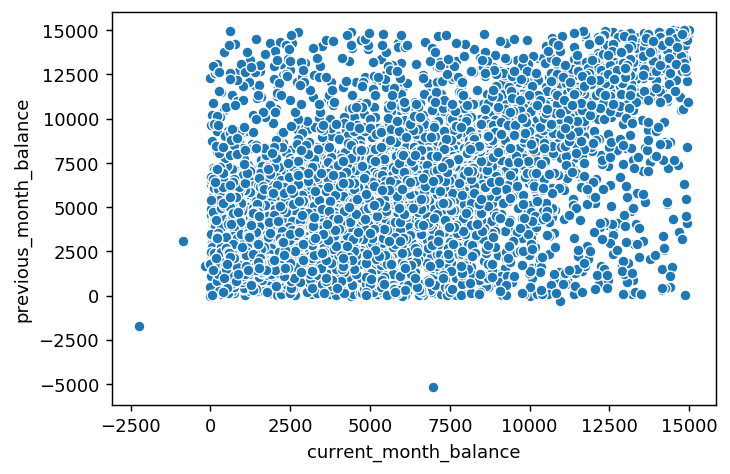

In [ ]:
# plotting scatterplot
plt.figure(dpi=130)
sns.scatterplot('current_month_balance','previous_month_balance', data=dummy)
plt.plot()

### 2D Kde plot

[]

<Figure size 840x560 with 0 Axes>

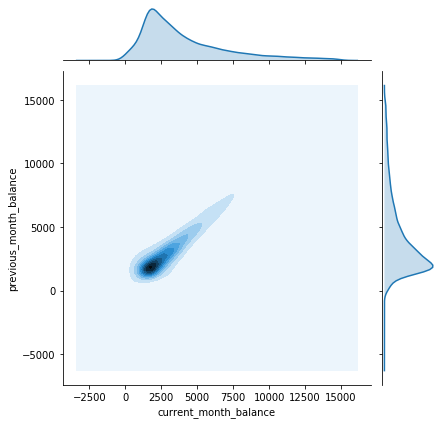

In [ ]:
plt.figure(dpi=140)
sns.jointplot('current_month_balance','previous_month_balance', data=dummy, kind='kde' )
plt.plot()